#Installing and importing dependencies



In [1]:
!wget https://github.com/ultralytics/yolov5.git

--2023-01-16 09:14:17--  https://github.com/ultralytics/yolov5.git
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/yolov5 [following]
--2023-01-16 09:14:17--  https://github.com/ultralytics/yolov5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘yolov5.git’

yolov5.git              [ <=>                ] 353.89K  --.-KB/s    in 0.02s   

2023-01-16 09:14:18 (18.9 MB/s) - ‘yolov5.git’ saved [362379]



In [2]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.0 MB/s eta 0:00:00


In [3]:
import os
import cv2

#Deployment

In [4]:
import torch

# Model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5l, yolov5x, etc.
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/best.pt', force_reload=True)  # custom trained model

# Images
im = '/content/image.jpg'  # or file, Path, URL, PIL, OpenCV, numpy, list

# Inference
results = model(im)

# Results

results.crop() # or .show(), .save(), .crop(), .pandas(), etc.

results.xyxy[0]  # im predictions (tensor)
results.pandas().xyxy[0]  # im predictions (pandas)


/usr/local/lib/python3.8/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-1-16 Python-3.8.16 torch-1.13.0+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



,xmin,ymin,xmax,ymax,confidence,class,name
0,234.764771,16.801373,377.101654,124.975136,0.900319,0,Hard-Hat


#Visualizing the result

In [5]:
bounding_box = results.pandas().xyxy[0]
image = cv2.imread("/content/image.jpg")

In [6]:
import cv2
import matplotlib.pyplot as plt
hard_hat = []

image_box = image

for i in bounding_box[['xmin','ymin','xmax','ymax','class']].values:
  if int(i[4]) == 0:
    hard_hat.append([i[0],i[1],i[2],i[3]])

  
for val in hard_hat:
  cv2.rectangle(image_box, (int(val[0]),int(val[1])),(int(val[2]),int(val[3])),(0,0,255),2)

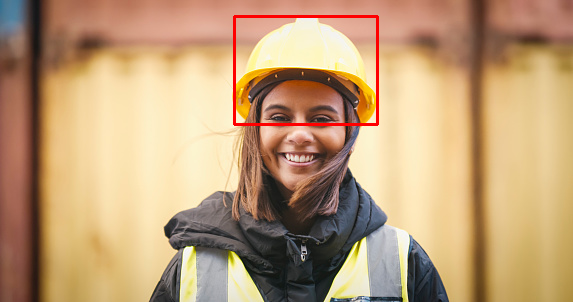

In [7]:
from google.colab.patches import cv2_imshow
cv2_imshow(image_box)